In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [16]:
df_real = pd.read_csv("winequality-white.csv")
df = df_real.copy()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [19]:
x = df.shape
df = df.drop_duplicates()
y = df.shape
print(y[0] - x[0])

-937


<Axes: >

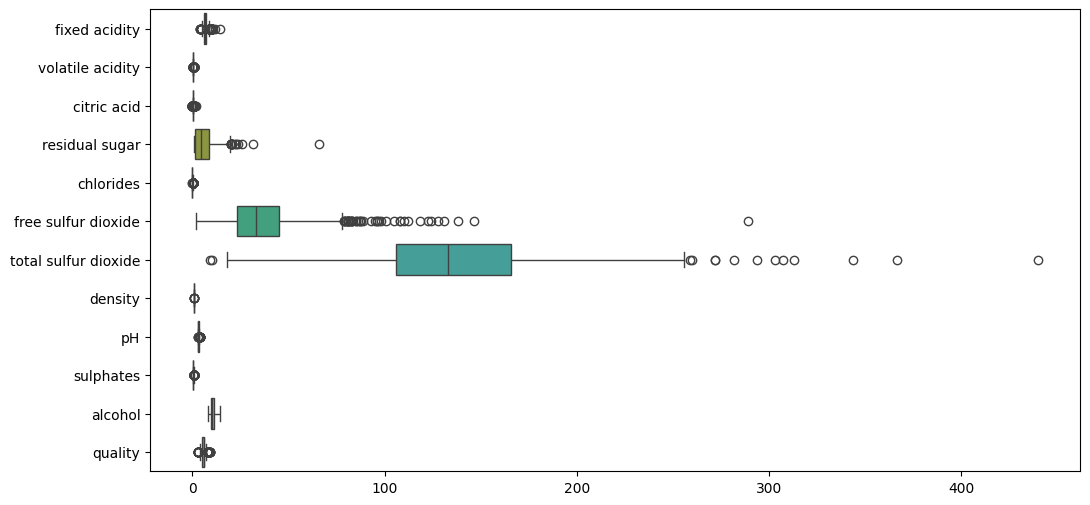

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(data=df, orient="h")

In [21]:
x = df.shape
df = df[(df["fixed acidity"] > 4) & (df["fixed acidity"] < 10.5)]
y = df.shape
print(y[0] - x[0])

-5


In [22]:
x = df.shape
df = df[df["residual sugar"] < 22]
y = df.shape
print(y[0] - x[0])

-6


In [23]:
x = df.shape
df = df[df["free sulfur dioxide"] < 101]
y = df.shape
print(y[0] - x[0])

-14


In [24]:
x = df.shape
df = df[(df["total sulfur dioxide"] < 260) & (df["total sulfur dioxide"] > 24)]
y = df.shape
print(y[0] - x[0])

-14


<Axes: >

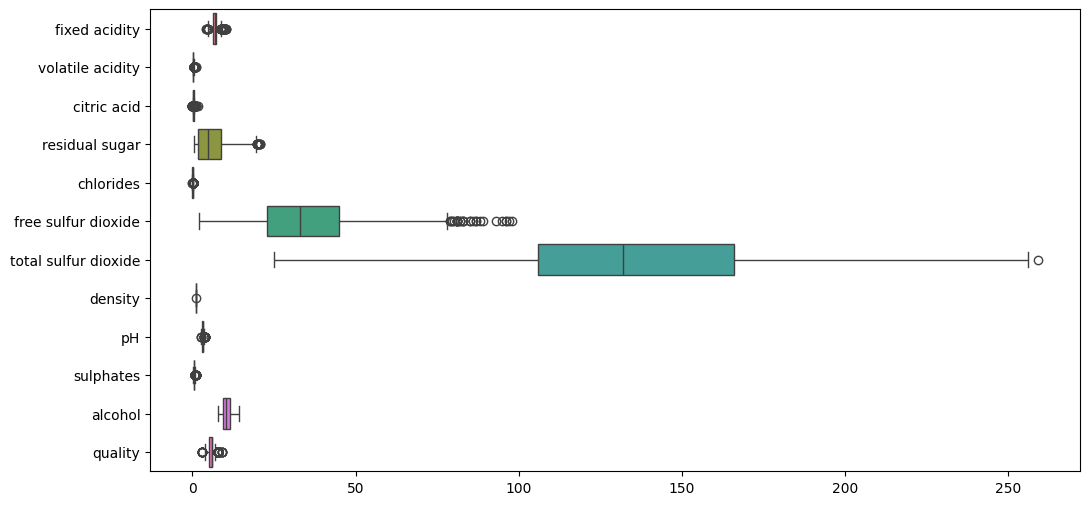

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(data=df, orient="h")

<Axes: >

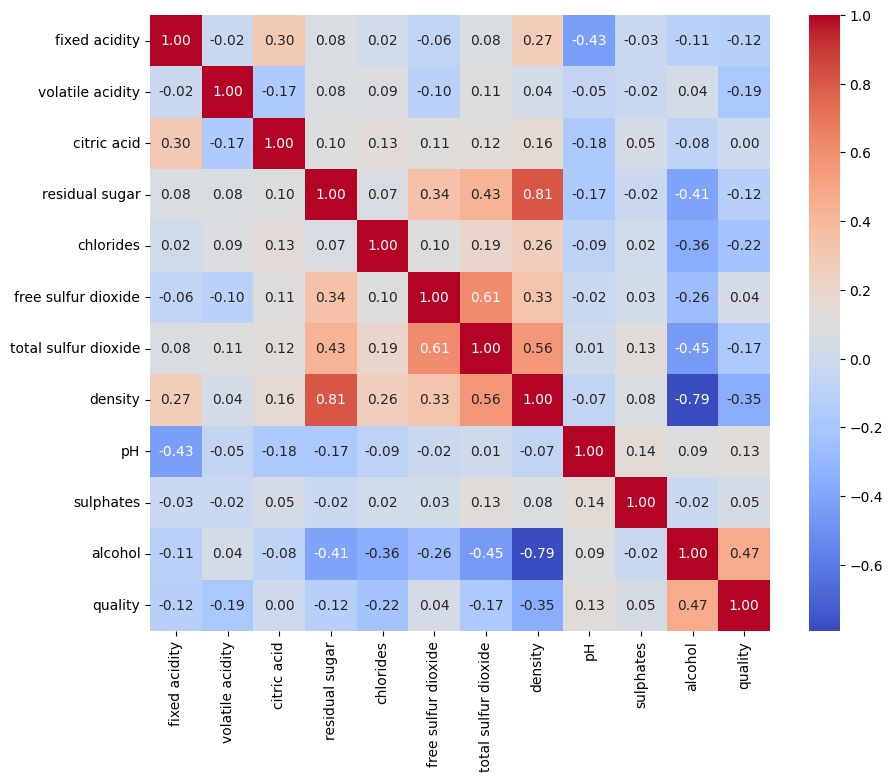

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [27]:
df = df.drop(columns=["density"])

<Axes: >

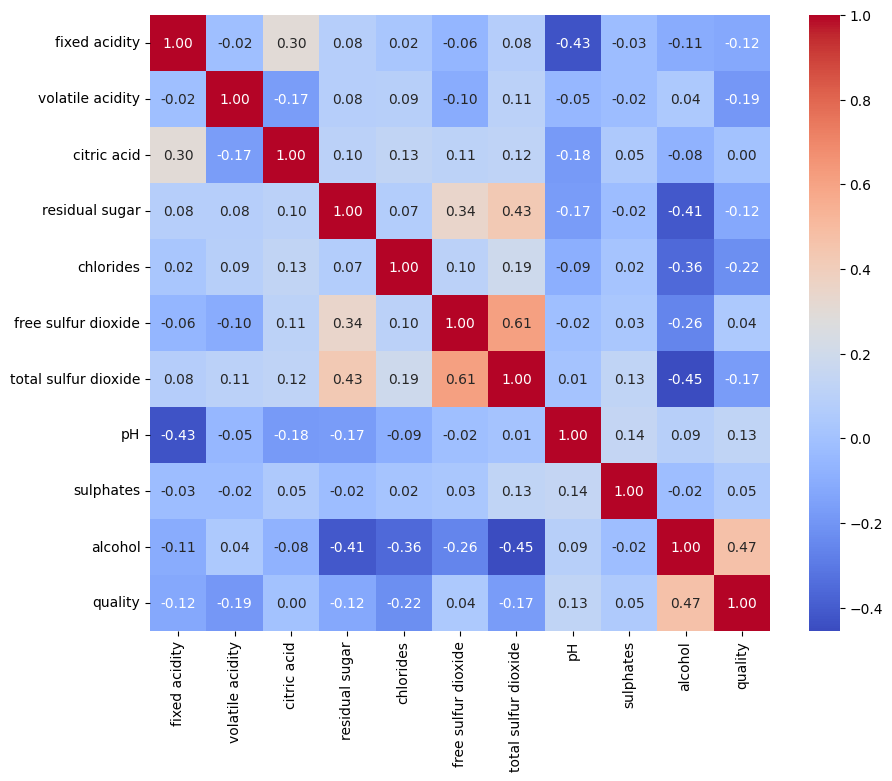

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [29]:
dataloss = (1 - (df.shape[0] / df_real.shape[0])) * 100
print(f"Data loss after removing outliers & duplicates: {dataloss:.2f}%")

Data loss after removing outliers & duplicates: 19.93%


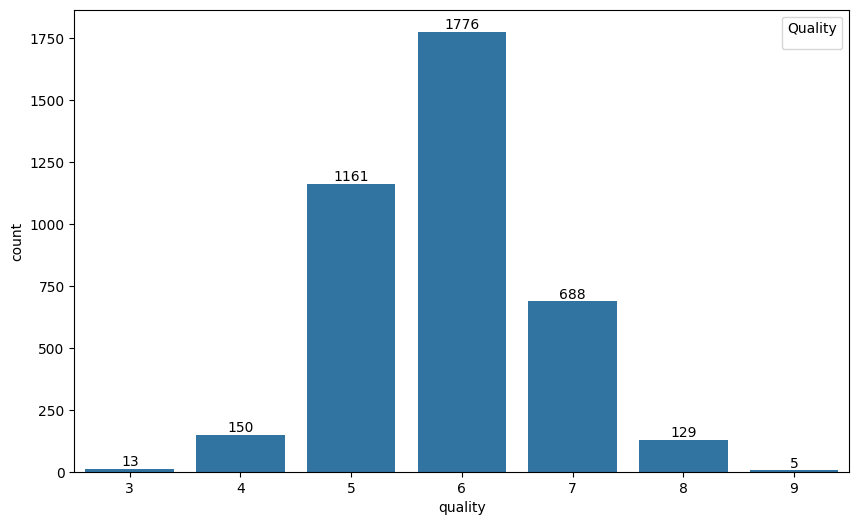

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(data=df, x="quality", ax=ax)
plt.bar_label(ax.containers[0])
plt.legend(title="Quality", loc="upper right")

In [31]:
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)
print(df["quality"].value_counts())
Ratio = df["quality"].value_counts()[0] / df["quality"].value_counts()[1]
print(f"Ratio of bad to good quality wines: {Ratio:.2f}:1")

quality
0    3100
1     822
Name: count, dtype: int64
Ratio of bad to good quality wines: 3.77:1


In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
y = df["quality"]
X = df.drop(columns=["quality"])

In [34]:
m = df.shape[0]
n = int(0.8 * m)
X_train = X.iloc[ : n].values
y_train = y.iloc[ : n].values
X_test = X.iloc[n : ].values
y_test = y.iloc[n : ].values

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
w = np.zeros(X_train.shape[1])
b = 0
lr = 0.005

In [37]:
def prediction(X, w, b):
    z = np.dot(X, w) + b
    return 1 / (1 + np.exp(-z))

In [38]:
def cost_func(y, y_pred):
    epsilon = 1e-15  # prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    total_cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return total_cost

In [39]:
def gradient(X, y, y_pred):
    m = X.shape[0]
    err = y_pred - y
    new_w = (1/m) * np.dot(X.T, err)
    new_b = (1/m) * np.sum(err)
    return new_w, new_b

In [40]:
cost_history = []
epochs = 10000

for epoch in range(epochs):
    y_pred = prediction(X_train, w, b)
    cost_value = cost_func(y_train, y_pred)
    cost_history.append(cost_value)
    new_dw, new_db = gradient(X_train, y_train, y_pred)
    w -= lr * new_dw
    b -= lr * new_db

print(f"Final weights: {w}")
print(f"Final bias: {b}")

Final weights: [-0.03091489 -0.24083777 -0.02713198  0.11205291 -0.36621018  0.3403374
 -0.26181104  0.25597891  0.15465487  1.15354662]
Final bias: -1.7043073849196744


In [41]:
y_pre = prediction(X_test, w, b)
y_pre = (y_pre >= 0.5).astype(int)

In [42]:
from sklearn.metrics import accuracy_score

print("Accuracy Score:")
print(accuracy_score(y_test, y_pre))

Accuracy Score:
0.7834394904458599


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train logistic regression model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.780891719745223
